<a href="https://colab.research.google.com/github/YoishD/Data-Science-B7/blob/main/YeshDakpU6proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import xarray as xr
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import bambi as bmb



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 925.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.9 MB/s eta 0:00:00


After digging through the website that Mr.A gave us, I found a data set on the results of the of 2014 Nfl Combine, and was curious on how certain variables were factored into the overall "grade" of an athlete. Just for some backgrond info, "grades" are assigned to differnt athletes, which essentialy are there to act as labels to differe the diffently leveling of skill and athletic ability. Typically a good grade to get is a 6.3, which indicates you can be a starter and can have a game winning impact of a game. What determines the grade  can be broken into two main variables, the "stats" of a player, and their "preformance". The Stats are essentially their height, weight,etc.. and their preformance, is their preformance in various exercises. I wanted to find out which variable is a greater predictor of grade, body stats or preformance? Before I do the project, I'll say that I think that performance is going to be the better predictor.

In [3]:
df1 = pd.read_fwf('https://raw.githubusercontent.com/AmitabhCh822/NFL-Combine-Performance-Prediction/refs/heads/main/nfl_combine_2014.dat.txt', index_col=0)

#Converting the dat file into csv file
df1.to_csv('nfl.csv')
df = pd.read_csv('nfl.csv')
df.drop(df.iloc[:,[0,1,2]], axis=1, inplace=True)
#I dont care about collums 0,1,cuz all those are on player positions, player names, and colleges
#I will say that it would be interesting to see the effect of position plays to the overall grade, maybe after i finish this one
df.columns = ['Grade', 'Height','A.Length', 'Weight', 'H.Length', '40Yard', 'BenchPress',
              'VerticalJump', 'BroadJump', '3Cone', '20Yard']
df = df.dropna()


In [ ]:
df

,Grade,Height,A.Length,Weight,H.Length,40Yard,BenchPress,VerticalJump,BroadJump,3Cone,20Yard
0,5.96,73,32.625,212,9.000,4.56,14.0,39.5,123.0,6.82,4.30
3,5.40,77,34.000,265,9.000,4.74,28.0,33.0,118.0,7.42,4.30
4,5.16,70,31.250,225,9.500,4.82,20.0,29.5,106.0,7.24,4.49
5,5.45,68,31.000,173,8.875,4.26,20.0,38.0,122.0,6.86,4.06
7,5.10,73,33.250,218,9.375,4.48,19.0,38.0,121.0,7.07,4.46
...,...,...,...,...,...,...,...,...,...,...,...
326,5.22,75,32.000,232,9.750,4.86,18.0,35.0,121.0,6.92,4.24
328,5.05,71,30.625,222,9.125,4.45,16.0,35.5,121.0,7.37,4.25
329,4.90,73,32.750,246,9.500,4.66,25.0,30.5,120.0,7.11,4.07
330,4.75,69,30.375,202,9.125,4.43,10.0,37.5,123.0,7.00,4.21


While looking around trying to figure out how to turn a .dat to a .cvs, I found a project on Github ([link](https://github.com/AmitabhCh822/NFL-Combine-Performance-Prediction/blob/eff6d1950eb485baee89a51d2348412422ffc22c/nfl_combine_analysis.py)), which tries to predict the 2014 Combine Preformance based off their stats. I am going to use this code for turning my .dat file into a csv file and nothing else

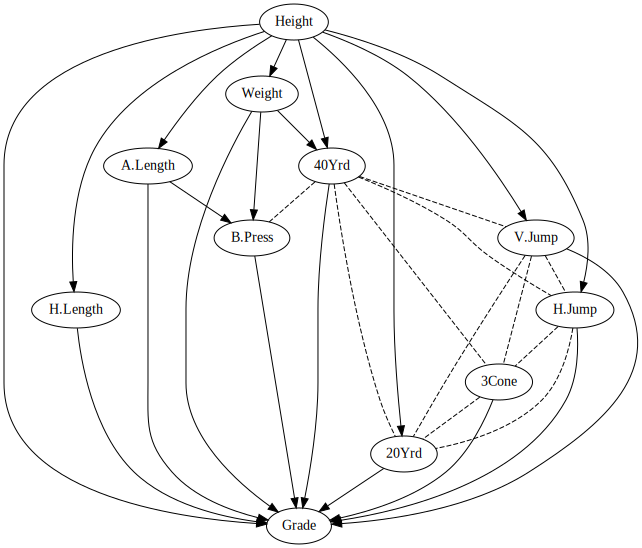

In [ ]:
g = gr.Digraph()
g.node(name="x1", label="Height")
g.node(name="y2", label="A.Length")
g.node(name="m3", label="H.Length")
g.node(name="x4", label="40Yrd")
g.node(name="y5", label="B.Press")
g.node(name="m6", label="V.Jump")
g.node(name="x7", label="H.Jump")
g.node(name="y8", label="3Cone")
g.node(name="m9", label="20Yrd")
g.node(name="x10", label="Grade")
g.node(name="w",label="Weight")
g.edge(tail_name="x1", head_name="y2")
g.edge(tail_name="x1", head_name="m3")
g.edge(tail_name="x1", head_name="x4")
g.edge(tail_name="x1", head_name="m6")
g.edge(tail_name="x1", head_name="x7")
g.edge(tail_name="x1", head_name="m9")
g.edge(tail_name="x1", head_name="x10")
g.edge(tail_name="x1", head_name="w")
g.edge(tail_name="w", head_name="x4")
g.edge(tail_name="w", head_name="y5")
g.edge(tail_name="w", head_name="x10")
g.edge(tail_name="y2", head_name="y5")
g.edge(tail_name="y2", head_name="x10")

#40Yrd
g.edge(tail_name="x4", head_name="y5",style="dashed", dir="none")
g.edge(tail_name="x4", head_name="m6",style="dashed", dir="none")
g.edge(tail_name="x4", head_name="x7",style="dashed", dir="none")
g.edge(tail_name="x4", head_name="m9",style="dashed", dir="none")
g.edge(tail_name="x4", head_name="x10")
g.edge(tail_name="x4", head_name="y8",style="dashed", dir="none")

#V.Jump
g.edge(tail_name="m6", head_name="x7",style="dashed", dir="none")
g.edge(tail_name="m6", head_name="m9",style="dashed", dir="none")
g.edge(tail_name="m6", head_name="x10")
g.edge(tail_name="m6", head_name="y8",style="dashed", dir="none")

#H.Jump
g.edge(tail_name="x7", head_name="m9",style="dashed", dir="none")
g.edge(tail_name="x7", head_name="x10")
g.edge(tail_name="x7", head_name="y8",style="dashed", dir="none")
#3Cone
g.edge(tail_name="y8", head_name="x10")
g.edge(tail_name="y8", head_name="m9",style="dashed", dir="none")

#Connects H.Length,BenchP to Grade
g.edge(tail_name="m9", head_name="x10")
g.edge(tail_name="y5", head_name="x10")
g.edge(tail_name="m3", head_name="x10")



g

This is a digital version of my causal diagram, the dotted lines indicate that there is a connection between the two predictors, but I am unsure of the direciton. I coded this after, I actually finished my project, but if I did this before, I could clearly see how Height is the main predictor, and all the other variables just tell more info about the height.

In [ ]:
model_combine = bmb.Model("'Grade'~'Height'+'Weight'+'A.Length'+'H.Length'+'40Yard'+'BenchPress'+'VerticalJump'+'BroadJump'+ '3Cone'+'20Yard'", data=df)
idata_combine = model_combine.fit(idata_kwargs={'log_likelihood': True})
#I am right now just seeing what happens if I just run my code without conencting any of my predictors


Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


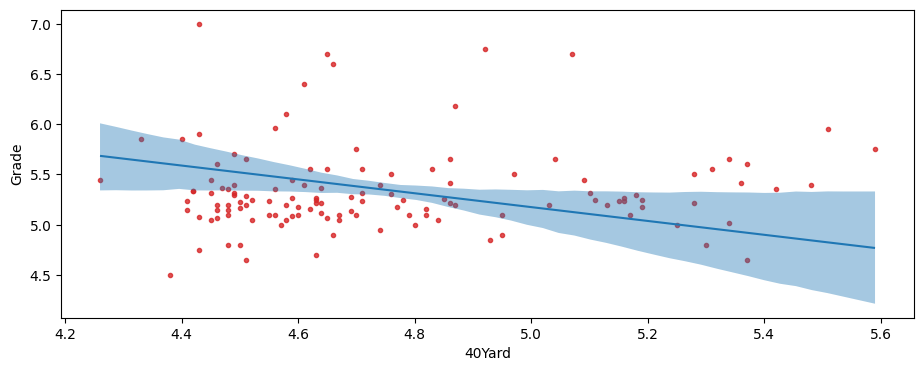

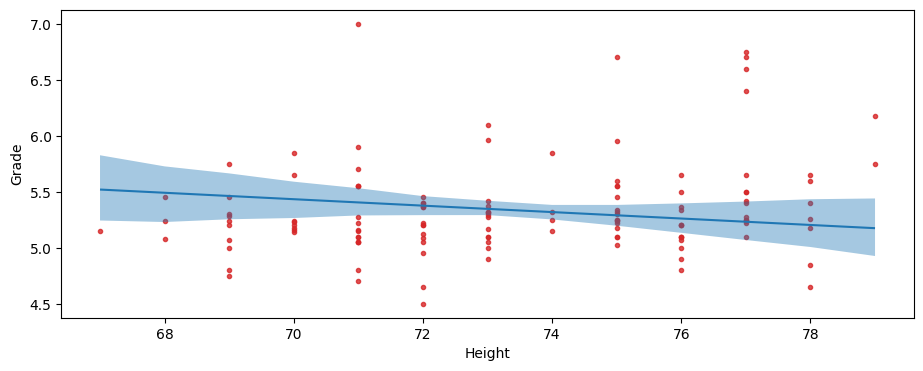

In [ ]:
bmb.interpret.plot_predictions(model_combine,
                               idata_combine,
                                ["40Yard"],legend = True, fig_kwargs={"figsize":(11, 4,)})
plt.plot(df['40Yard'], df.Grade, "C3.", zorder=-3,alpha=.8)
bmb.interpret.plot_predictions(model_combine,
                               idata_combine,
                                ["Height"],legend = True, fig_kwargs={"figsize":(11, 4)})
plt.plot(df.Height, df.Grade, "C3.", zorder=-3, alpha=.8)


It looks like our model for both are both poor, where our Hdi's completly miss majority of our data points. Very clearly we need to edit our priors/model itself in order to better represent our data. I am going to try and graph all my variables so I can see which model to use to better represent them.

In [8]:
priors = {"Height" : bmb.Prior("Normal", mu=73,sigma=4), "alpha" : bmb.Prior("HalfNormal",sigma=10),"40Yard" : bmb.Prior("negativebinomial", mu=4.8,sigma=.8), "alpha" : bmb.Prior("HalfNormal",sigma=10)}
#Im only really going to be focusing on these two as these are the

In [9]:
model_combine = bmb.Model("'Grade'~'Height'+'Weight'+'A.Length'+'H.Length'+'40Yard'+'BenchPress'+'VerticalJump'+'BroadJump'+ '3Cone'+'20Yard'", data=df,family="gaussian")
idata_combine = model_combine.fit(idata_kwargs={'log_likelihood': True})


Output()

Output()

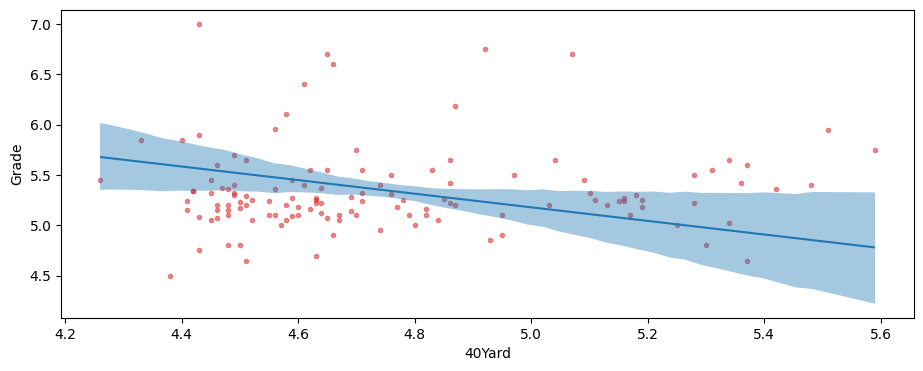

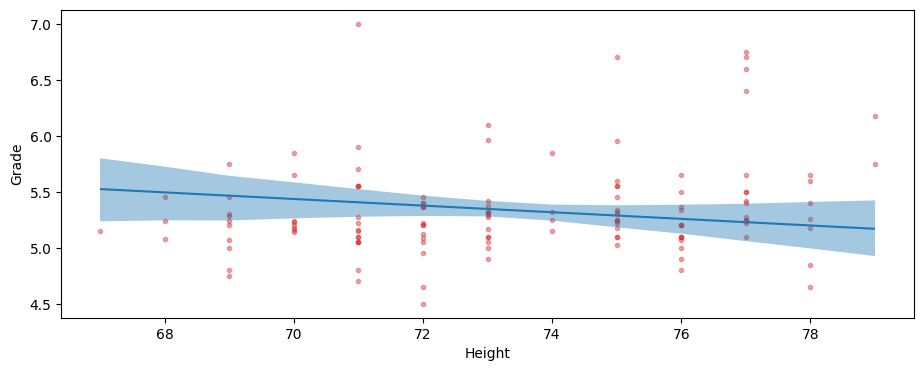

In [10]:
bmb.interpret.plot_predictions(model_combine,
                               idata_combine,
                                ["40Yard"],legend = False, fig_kwargs={"figsize":(11, 4)},prob=.95)
plt.plot(df['40Yard'], df.Grade, "C3.", zorder=-3, alpha = .5)

bmb.interpret.plot_predictions(model_combine,
                               idata_combine,
                                ["Height"],legend = False, fig_kwargs={"figsize":(11, 4)}, prob=.95)
plt.plot(df.Height, df.Grade, "C3.", zorder=-3, alpha= .4)

This is alot better for our second attempt and actually does capture most of our data but it also is very wide in hdi so not very precise.

<Axes: xlabel='Grade'>

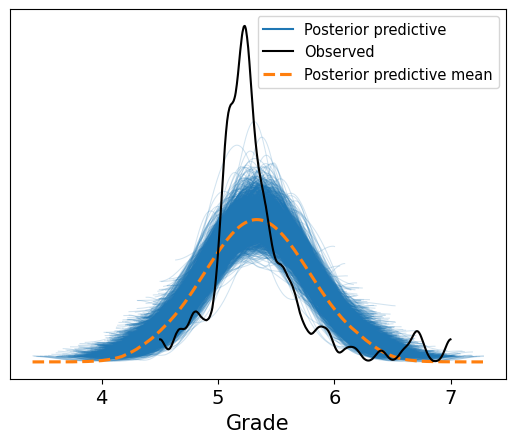

In [11]:
model_combine.predict(idata_combine, kind='response')
az.plot_ppc(idata_combine)

Two things, first the really big extreme at around 5 is something I dont think I would be model accurately, and second I will need to move my mean and lower my standard deviation. It should be to hard as i think my mean is actually around the right spot, I just need to restrict my standard deviation by quite a  bit. I am also going to include all the interactions between the variables

In [4]:
model_combine_all = bmb.Model("'Grade'~'Height'+'Weight'+'A.Length'+'H.Length'+'40Yard'+'BenchPress'+'VerticalJump'+'BroadJump'+'3Cone'+'20Yard'+'Height':'Weight'+'Height':'A.Length'+'Height':'H.Length'+'3Cone':'20Yard'+'3Cone':'40Yard'+'3Cone':'VerticalJump'+'3Cone':'BroadJump'+'BroadJump':'VerticalJump'+'40Yard':'VerticalJump'+'20Yard':'VerticalJump'+'40Yard':'BroadJump'+'20Yard':'BroadJump'+'40Yard':'BenchPress'+'40Yard':'3Cone'+'Height':'40Yard'+'Height':'VerticalJump'+'Height':'BroadJump'+'Height':'3Cone'+'Height':'20Yard'+'Weight':'40Yard'+'Weight':'BenchPress'+'A.Length':'BenchPress'", data=df,family="gaussian")
idata_combine_all = model_combine_all.fit(idata_kwargs={'log_likelihood': True})
#I am right now just seeing what happens when all my things are connected
#I tried messing with the priors but all that happened is that this model just stopped being able to run. I'm sure if I had more time I could actually find decent priors but for now I just have to stick with the basic ones. I also tried messing around with the family, but the same thing happened, where I just wasn't able to get it to run with the other families.

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


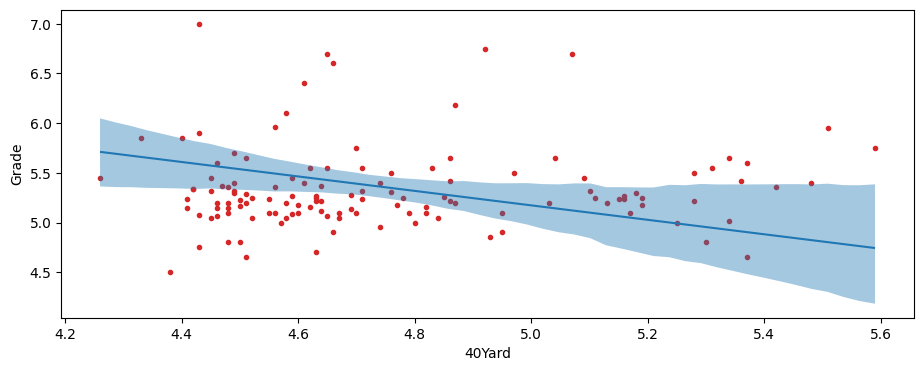

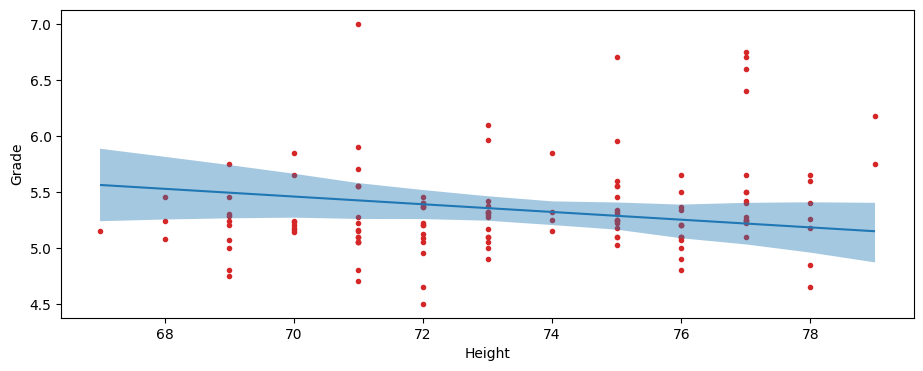

In [5]:
  bmb.interpret.plot_predictions(model_combine_all,
                               idata_combine_all,
                                ["40Yard"],legend = False, fig_kwargs={"figsize":(11, 4)})
#This is to compare to the model for preformance
#40Yrd was chosen as it has the most interactions between other Performance variables
plt.plot(df['40Yard'], df.Grade, "C3.", zorder=-3)

bmb.interpret.plot_predictions(model_combine_all,
                               idata_combine_all,
                                ["Height"],legend = False, fig_kwargs={"figsize":(11, 4)})
#This is to compare to the model for stats
#Height was chosen as looking at the casual diagram, it has the most conenctions with other physical variables
plt.plot(df.Height, df.Grade, "C3.", zorder=-3)

So its alot worse without my updated priors and its actually only a little better than my graph original model, that one with the old priors and no predictors.

<Axes: xlabel='Grade'>

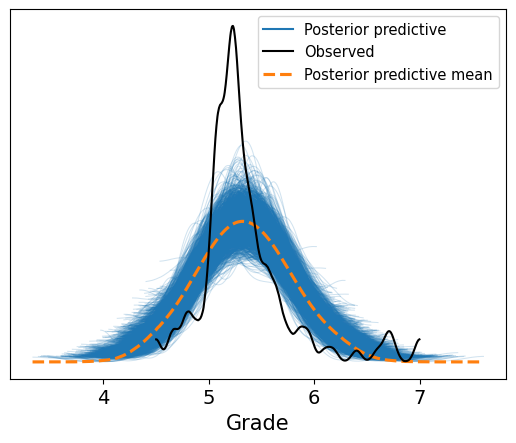

In [7]:
model_combine_all.predict(idata_combine_all, kind='response')
az.plot_ppc(idata_combine_all)

No signifcant difference from the PPC with the updated priors and no predictors. The spikes makes me feel more strongle that  I need to approach grade different or shift the model I am actually using. However I just don't have enough time. I think I really should have done this at the start of the project, however most of my time was just spent trying to get my data actually in working form or trying to find the connections between my predictors, so I just have to continue knowing my model is going to be flawed.

In [ ]:
priors = {"Height" : bmb.Prior("Normal", mu=73,sigma=4), "alpha" : bmb.Prior("HalfNormal",sigma=10),"40Yard" : bmb.Prior("negativebinomial", mu=4.8,sigma=.8), "alpha" : bmb.Prior("HalfNormal",sigma=10)}
#I think the reason why changing the distribution of my priors had such a negative impact

In [13]:
model_combine_phy = bmb.Model("'Grade'~'Height'+'Weight'+'A.Length'+'H.Length'+'Height':'Weight'+'Height':'A.Length'+'Height':'H.Length'", data=df,family="gaussian")
idata_combine_phy = model_combine_phy.fit(idata_kwargs={'log_likelihood': True})
#This model is all about the physical stats of a player. The predictions of this model will be compared to the predicotrs of one entirely run on performance varibales

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


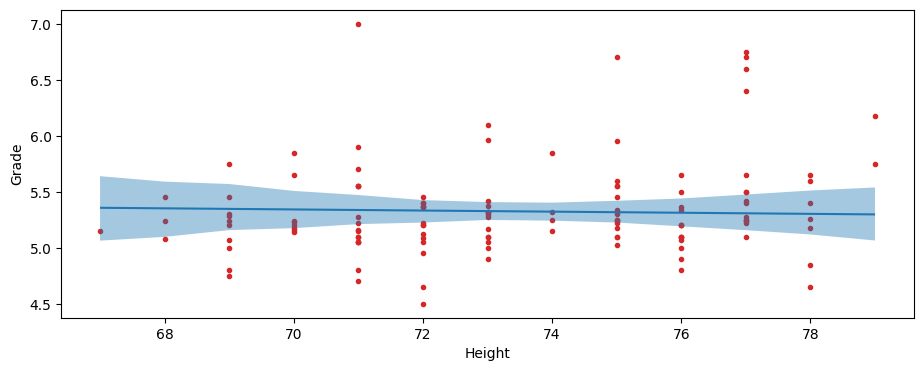

In [14]:
bmb.interpret.plot_predictions(model_combine_phy,
                               idata_combine_phy,
                                ["Height"],legend = False, fig_kwargs={"figsize":(11, 4)})
plt.plot(df.Height, df.Grade, "C3.", zorder=-3)

Slope of the inner line looks really flat especially when compared to the one with all the predictors. HDI also is really large for weight. I'm guessing the reason is, is that you can be really heaviy but have no athletic abilty because the weight you have isn't muscle, which is why there is such a wide range on the heavier side.

<Axes: xlabel='Grade'>

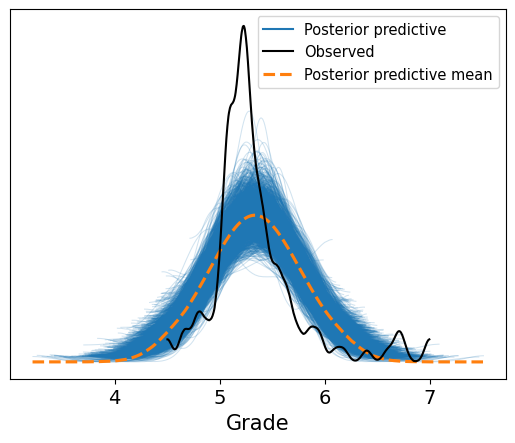

In [15]:
model_combine_phy.predict(idata_combine_phy, kind='response')
az.plot_ppc(idata_combine_phy)

There is really no drastic change in the PPC cause, despite using different priors and predictors, I am not able to change my actually family so easily, and would require more indepth experimentation to actually figure out what would model it best. And it is the actually family/model type im using that would have the greatest effect.

In [16]:
model_combine_pre = bmb.Model("'Grade'~'40Yard'+'BenchPress'+'VerticalJump'+'BroadJump'+ '3Cone':'20Yard'+'3Cone':'40Yard'+'3Cone':'VerticalJump'+'3Cone':'BroadJump'+'BroadJump':'VerticalJump'+'40Yard':'VerticalJump'+'20Yard':'VerticalJump'+'40Yard':'BroadJump'+'20Yard':'BroadJump'+'40Yard':'BenchPress'", data=df, family= "gaussian")
idata_combine_pre = model_combine_pre.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


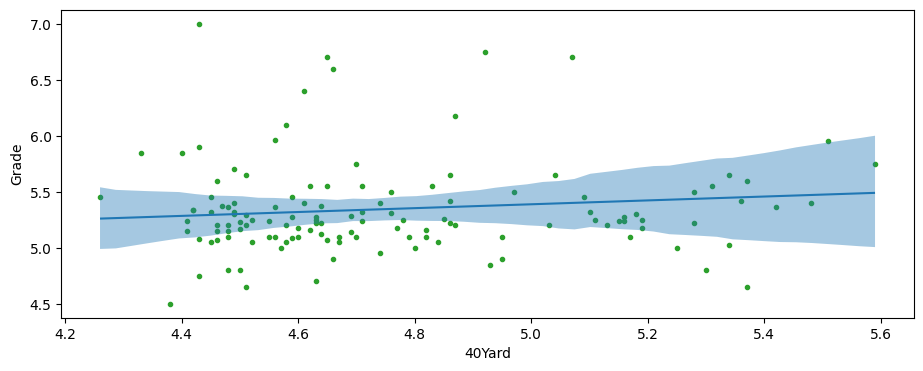

In [17]:
bmb.interpret.plot_predictions(model_combine_pre,
                               idata_combine_pre,
                                ["40Yard"],legend = False, fig_kwargs={"figsize":(11, 4)})
plt.plot(df['40Yard'], df.Grade, "C2.", zorder=-3)

Slop has changed from the model with all predictions, it has become more positive, which is a drastic change, indicating that weight has a big effect. Compared to the model with just weight as a predictor, this one seems to capture more data points.

<Axes: xlabel='Grade'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


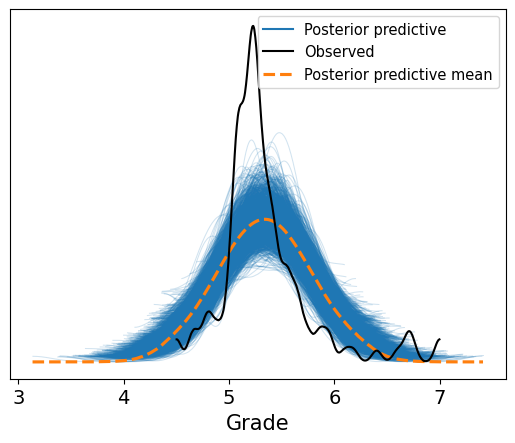

In [19]:
model_combine_pre.predict(idata_combine_pre, kind='response')
az.plot_ppc(idata_combine_pre)

Yeah I kind of proved my point here, where there really isn't any big differences

In [ ]:
cmp_df_bmb = az.compare( {"All":idata_combine_all,"Physical":idata_combine_phy, "Performance":idata_combine_pre, "Priors":idata_combine} )
cmp_df_bmb

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
All,0,-66.855758,17.432389,0.000000,5.395670e-01,12.410654,0.000000,True,log
Physical,1,-68.627014,7.339122,1.771256,4.469387e-01,13.784525,5.004826,False,log
Performance,2,-77.357104,12.388884,10.501347,6.720753e-13,14.111587,6.350463,False,log
Priors,3,-231.300431,0.877250,164.444673,1.349428e-02,0.676663,11.879452,False,log


So it appears my original guess was wrong, and that Physical variables have a larger impact than Performance. If I review my Causal Diagram, I actually would've been able actualy predicted this relationship, as all variables are connected to height, in some way. In all actuality, I think I was overcomplicating all of my analysis, and that if I had reviewed my Causal Diagram more carefully, I would have been able to spot how all my predictors had some interaction with height, which would have been pointed towards Physical stats, being the best way to predict a player's grade. I really should have removed some of my predictors, such as H.Length or BenchPress, simply because they don't tell us any new information, and I think that doing this would've also kept the coding a lot more lighter and managable. I also wished I had found the Github of the person's code I had copied, as trying to figure out how to convert my data into to a .csv file was a whole thing on its own.

For the future, I do really want to look into something called a "Do" function, something Mr.A introduced me to, during the later half of this project. Which focuses on how I could possble use the Performance varables to predict the Physical, and I could also try to incorporate actually game preformance into my analysis. I did some brief reserach and took some notes on what Do operators are and how I can incorporate into my model in the context of my data set.

A Do Operator, asks the question "what if". In the context of this data set, it would "what would happen if a player was x' tall."
In order to actually incorporate this, we set that height variable as a constant and remove all causal influence on it. The problem is that the way we set up our variables as two way interactions, meaning that we can't simply remove all interactions between height, we need to somehow add directionality,then remove all interactions that are directly contributing to height, but keep the interactions, where height is effecting.


After meeting with Mr.A, he mentioned I will have to remake my model in Base Pymc, in order to incorporate this directionality. However I don't have enough time as I have to reinterpret my new graphs with the raw data behind them. Maybe in another project I can come back and focus more on incorporating a DO Operator within my analysis.